In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import imdb

# Test model sur imbd des CNN 

In [ ]:
#Load data 
(train_x,train_y),(test_x,test_y) = imdb.load_data(num_words=1000)

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
#WORDS (w tokenazation then assigning numb to each word then each numb )
print("review ", train_x[5])
#LAbel associated is where the reviex is 
print("label ",train_y[5])

review  [1, 778, 128, 74, 12, 630, 163, 15, 4, 2, 2, 2, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 2, 173, 4, 749, 2, 16, 2, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]
label  0


In [ ]:
#Vocabulary of the dataset
vocab = imdb.get_word_index()
#print(vocab)

In [ ]:
from keras.preprocessing import sequence
max_word=500 #We are going to use 500 words in each review, 
#if sequence shorter then pair with 0
train_x=sequence.pad_sequences(train_x,maxlen=max_word)
test_x=sequence.pad_sequences(test_x,maxlen=max_word)

In [ ]:
#Model 
import tensorflow
from tensorflow.keras.datasets import imdb
from tensorflow.keras.initializers import lecun_uniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
#Indicates that layers are struc one after another 
model = Sequential()
#1000 unique words as input,Vector of dimension 300 (donc matrice 1000*300)
model.add(Embedding(1000,300,input_length=max_word))
#64 filters (kernels) , of size 3 
model.add(Conv1D(64,3,activation="relu"))
#2 by 2 suparts of the feature map 
model.add(MaxPooling1D(2,2))
#32 filters (kernels) , of size 3 
#model.add(Conv1D(32,3,activation="relu"))
#model.add(MaxPooling1D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
#model.add(Dense(8,activation='relu'))
#model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer= 'adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 300)          300000    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 498, 64)           57664     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 249, 64)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15936)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15936)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 127496    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [31]:
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['acc'])
history= model.fit(train_x,train_y,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2
                  )

Epoch 1/10
157/157 [==============================] - 117s 738ms/step - loss: 0.6920 - acc: 0.5106 - val_loss: 0.6080 - val_acc: 0.7292
Epoch 2/10
157/157 [==============================] - 115s 733ms/step - loss: 0.4781 - acc: 0.8050 - val_loss: 0.3380 - val_acc: 0.8564
Epoch 3/10
157/157 [==============================] - 115s 735ms/step - loss: 0.2895 - acc: 0.8778 - val_loss: 0.3161 - val_acc: 0.8658
Epoch 4/10
157/157 [==============================] - 115s 733ms/step - loss: 0.2635 - acc: 0.8927 - val_loss: 0.3220 - val_acc: 0.8646
Epoch 5/10
157/157 [==============================] - 116s 738ms/step - loss: 0.2450 - acc: 0.9028 - val_loss: 0.3221 - val_acc: 0.8664
Epoch 6/10
157/157 [==============================] - 115s 733ms/step - loss: 0.2170 - acc: 0.9135 - val_loss: 0.3346 - val_acc: 0.8608
Epoch 7/10
157/157 [==============================] - 117s 742ms/step - loss: 0.1900 - acc: 0.9266 - val_loss: 0.3334 - val_acc: 0.8666
Epoch 8/10
157/157 [============================

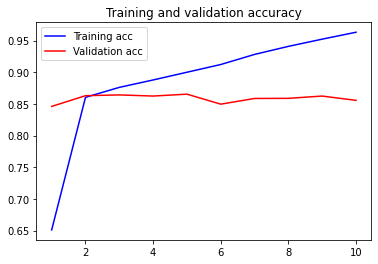

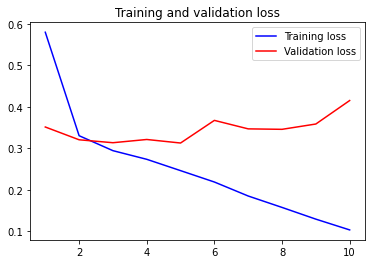

In [ ]:
#Data Vis
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc=history.history['val_acc']
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()